# IMPORT LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# FOOD DELIVERY TRIPS CAMBRIDGE

## IMPORT DATA


### Demand

In [ ]:
filepath_demand = "/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/"
demand_df = pd.read_csv(filepath_demand + 'fooddeliverytrips_cambridge.csv')
l_d = len(demand_df)

### Car Events


In [ ]:
os.chdir("/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/TraditionalScenario/Combustion_Cars")

if True: #Load all csv files in directory and concat just once 
    extension = 'csv'
    
    #Package events
    package_events_filenames =[i for i in glob.glob('package_event*.{}'.format(extension))]
    package_events_df_temp= pd.concat([pd.read_csv(f) for f in package_events_filenames ])
    

## DEMAND PROFILE

### Food delivery trips data

In [ ]:
start_time_df = pd.DataFrame(demand_df['start_time'])

from datetime import datetime as dt
fmt="%Y-%m-%d %H:%M:%S"
for i in range(len(start_time_df)):
  value=(dt.strptime(start_time_df.at[i,'start_time'],fmt).time())
  start_time_df.at[i,'start_time']=value

for i in range(len(start_time_df)):
  time_stamp = start_time_df.at[i,'start_time']
  hour = time_stamp.hour
  minute = time_stamp.minute
  second = time_stamp.second

  hours_total = hour + minute/60 + second/(60*60)

  start_time_df.at[i,'Time'] = hours_total

Text(0.5, 0, 'Time of the day')

<Figure size 2000x1000 with 0 Axes>

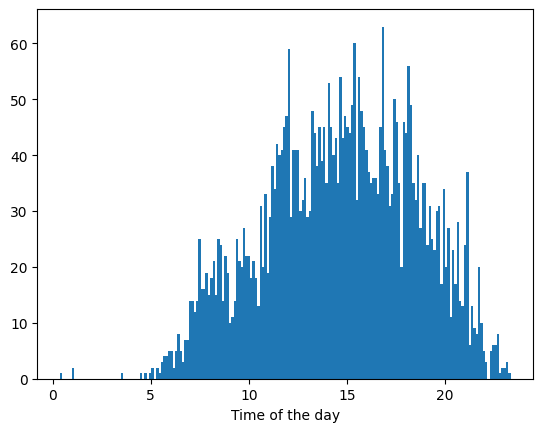

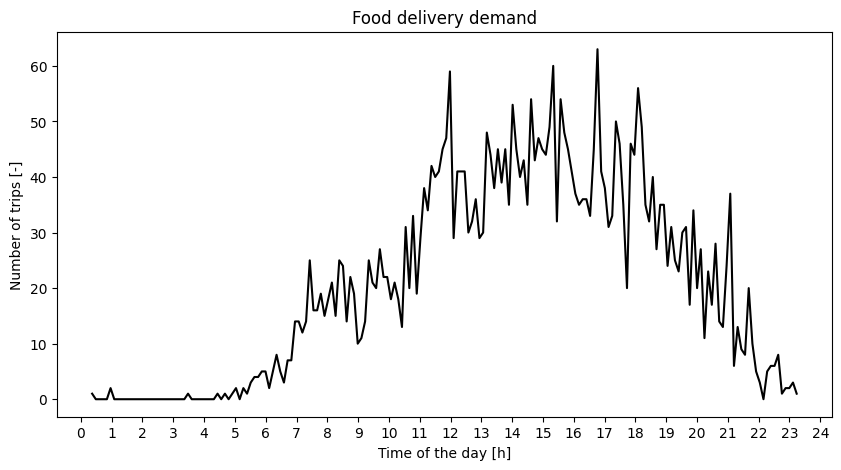

In [ ]:
plt.figure(figsize=(20,10))

fig, ax = plt.subplots()
counts, bin_edges, patches = ax.hist(pd.Series(start_time_df['Time']), bins=192)

# Retrieve values from histogram
# counts, bin_edges = histogram[0], histogram[1]

# Create new DataFrame with counts and bin edges
df = pd.DataFrame({'counts': counts, 'bin_edges': bin_edges[:-1]})
x = np.array(df['bin_edges'])
y = np.array(df['counts'])

# Create line chart
plt.figure(figsize=(10,5))
plt.title('Food delivery demand')
plt.plot(x, y, color='black')
plt.xlabel('Time of the day [h]')
plt.ylabel('Number of trips [-]')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

ax.set_xlabel('Time of the day')

### Package events data

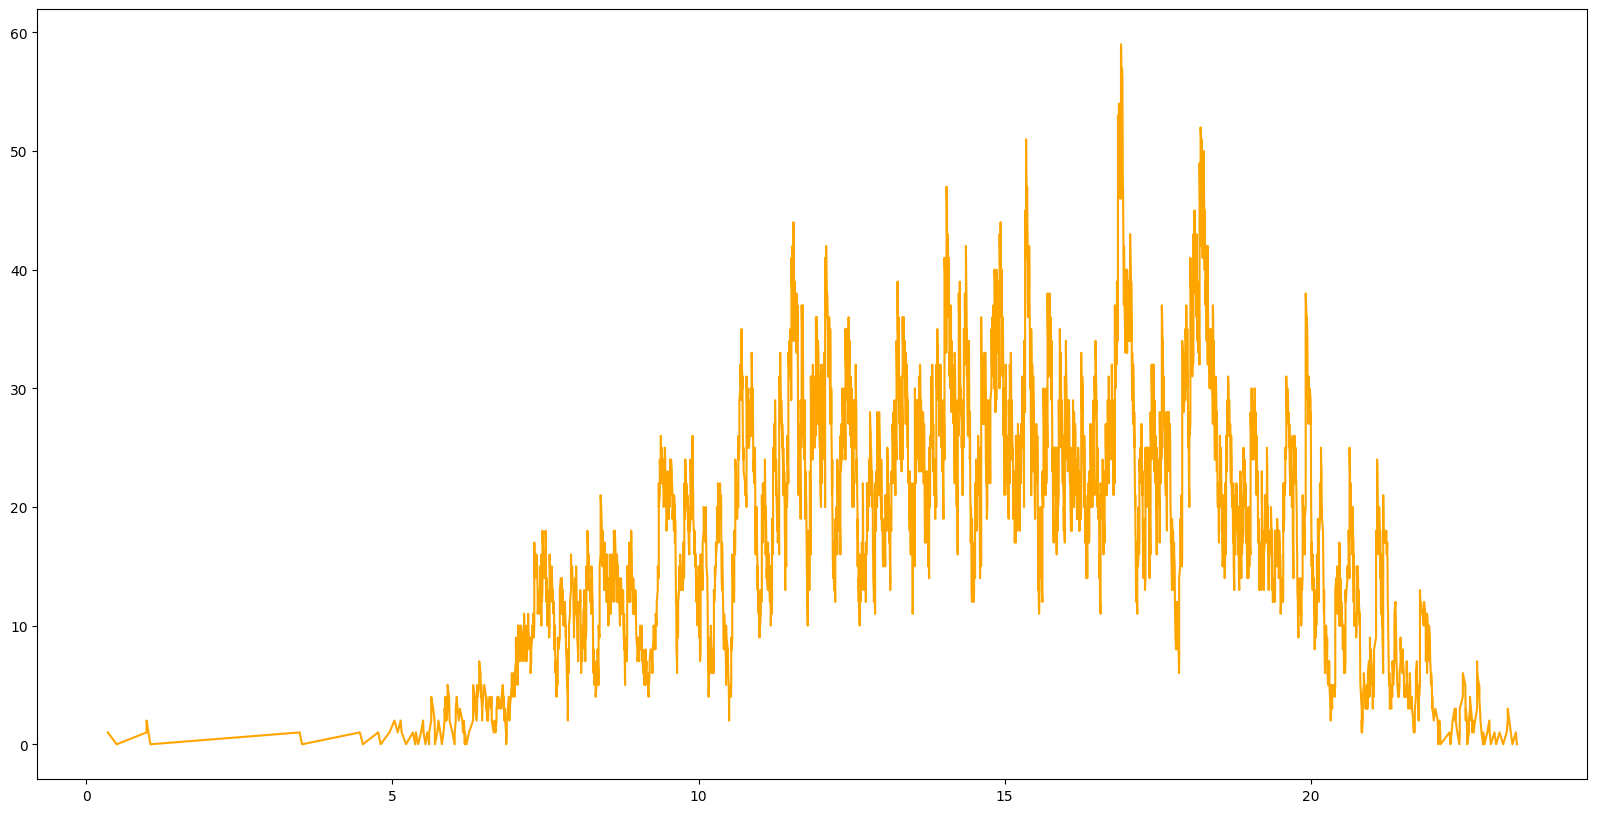

In [ ]:
nominal_scenario = package_events_df_temp[package_events_df_temp['Num Cars']==60].reset_index().drop('index',axis=1)

food_demand_df = nominal_scenario.loc[(nominal_scenario['Event'] == 'START: requestingDeliveryMode') | (nominal_scenario['Event'] == 'END: delivering_car')]
df = food_demand_df
count = 0

demand_count = pd.DataFrame(columns=['Time', 'Count'])
    
for i,row in df.iterrows():
    event = row["Event"]
    if event == 'END: delivering_car':
        count = count-1
    elif event == 'START: requestingDeliveryMode':
        count = count+1
    else:
        print('Event type error')
    # stopped_count.loc[i] = [i] + [count]
    demand_count.at[i,'Count'] = count
    demand_count.at[i,'Time'] = df.at[i,'Cycle']*2/(60*60)

plt.figure(figsize=(20,10))
plt.plot( 'Time', 'Count', data = demand_count,   color='orange', label="Active Demand")

## PREVIOUS

([<matplotlib.axis.XTick at 0x7f9b25c4c9a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

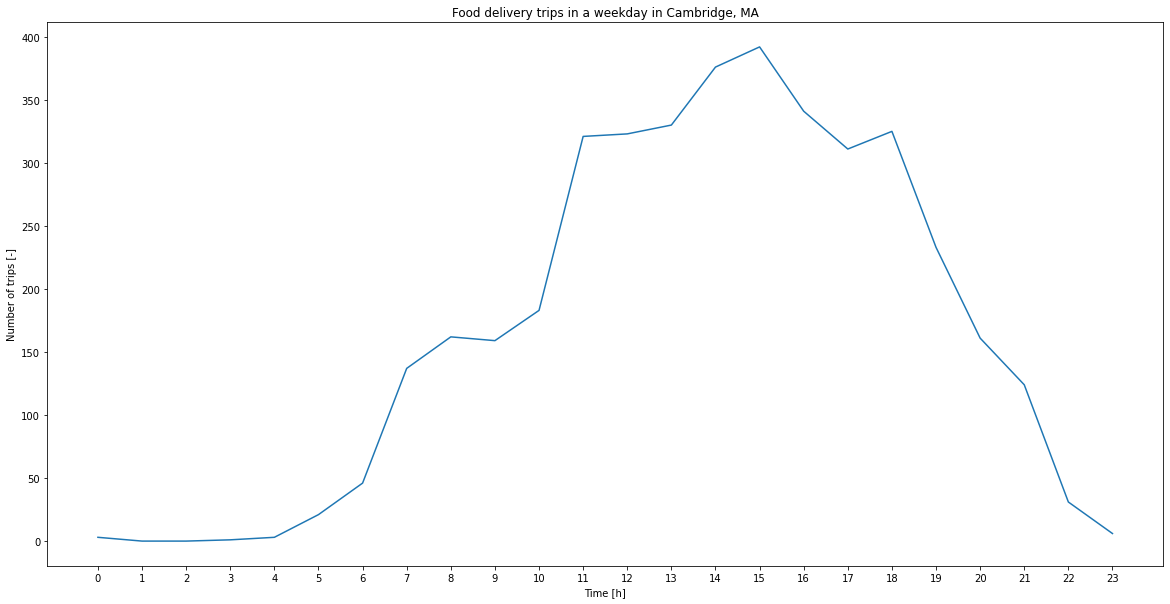

In [ ]:
demand_curve_df = pd.DataFrame({'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 'Count': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
l_d_c = len(demand_curve_df)

for i in range(l_d):
  for j in range(l_d_c):
    if demand_df.at[i,'start_hour']==demand_curve_df.at[j,'Hour']:
      demand_curve_df.at[j,'Count'] = demand_curve_df.at[j,'Count'] + 1
      break

plt.figure(figsize=(20,10))
plt.plot(demand_curve_df['Hour'],demand_curve_df['Count'])
plt.title('Food delivery trips in a weekday in Cambridge, MA')
plt.xlabel('Time [h]') 
plt.ylabel('Number of trips [-]') 
plt.xticks(demand_curve_df['Hour'][::1])

# EAT TRIPS CAMBRIDGE

## IMPORT DATA

In [ ]:
filepath_trips = "/content/drive/MyDrive/PFM/01 Mobility/Food Delivery Study/Data Analysis/Cambridge/"
total_demand_df = pd.read_csv(filepath_demand + 'replica_cambridge_bq_df.csv')
eat_demand_df = total_demand_df[total_demand_df['travel_purpose']=='EAT'].reset_index().drop('index',axis=1)
l_ed = len(eat_demand_df)

## DEMAND CURVE

Text(0.5, 0, 'Time [h]')

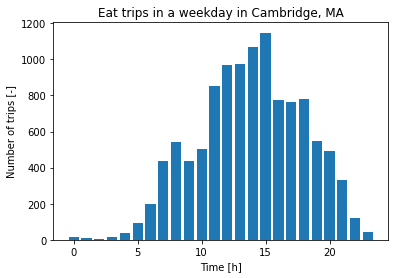

In [ ]:
eat_demand_curve_df = pd.DataFrame({'Hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 'Count': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
l_ed_c = len(eat_demand_curve_df)

for i in range(l_ed):
  for j in range(l_ed_c):
    if eat_demand_df.at[i,'start_local_hour']==eat_demand_curve_df.at[j,'Hour']:
      eat_demand_curve_df.at[j,'Count'] = eat_demand_curve_df.at[j,'Count'] + 1
      break

plt.bar(eat_demand_curve_df['Hour'],eat_demand_curve_df['Count'])
plt.title('Eat trips in a weekday in Cambridge, MA')
plt.xlabel('Time [h]')
plt.ylabel('Number of trips [-]') 